# Introduction

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
For example, here's several helpful packages to load

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as pp
from decision_trees import Preprocessor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_train: pd.DataFrame = pd.read_csv("./input/train.csv")
df_test: pd.DataFrame = pd.read_csv("./input/test.csv")

df_train.describe()
print(df_train.info())
print(df_train.head(10))
print(df_train.isnull().sum())


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Preprocessing (siehe Preprocessor)

In [6]:
X_y, X, y = Preprocessor().process(df_train)

X.info()
X.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
6,1,1,54.0,0,0,51.8625,2
7,3,1,2.0,3,1,21.0750,2
8,3,0,27.0,0,2,11.1333,2
9,2,0,14.0,1,0,30.0708,0
10,3,0,4.0,1,1,16.7000,2


# Korrelations Matrix
Anfangs erkennen zwischen welchen Features hohe  Korrelationen zu erwarten sind und diese sich genauer ansehen

In [7]:
corr_matrix: pd.DataFrame = X.corr()
corr_matrix


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


# Categorial plots

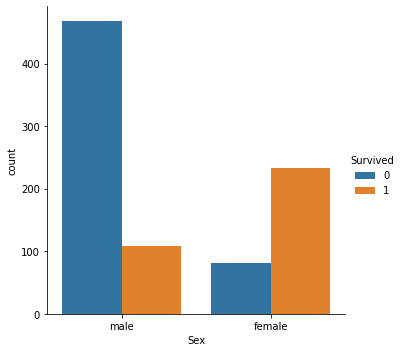

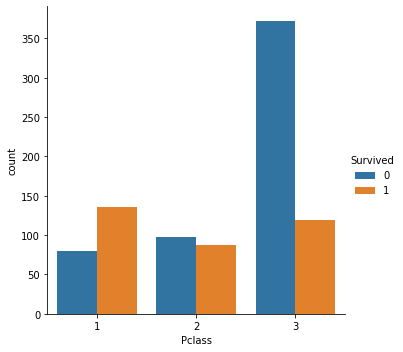

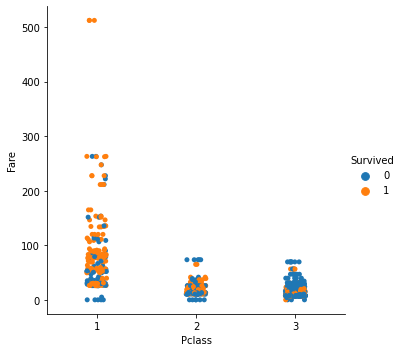

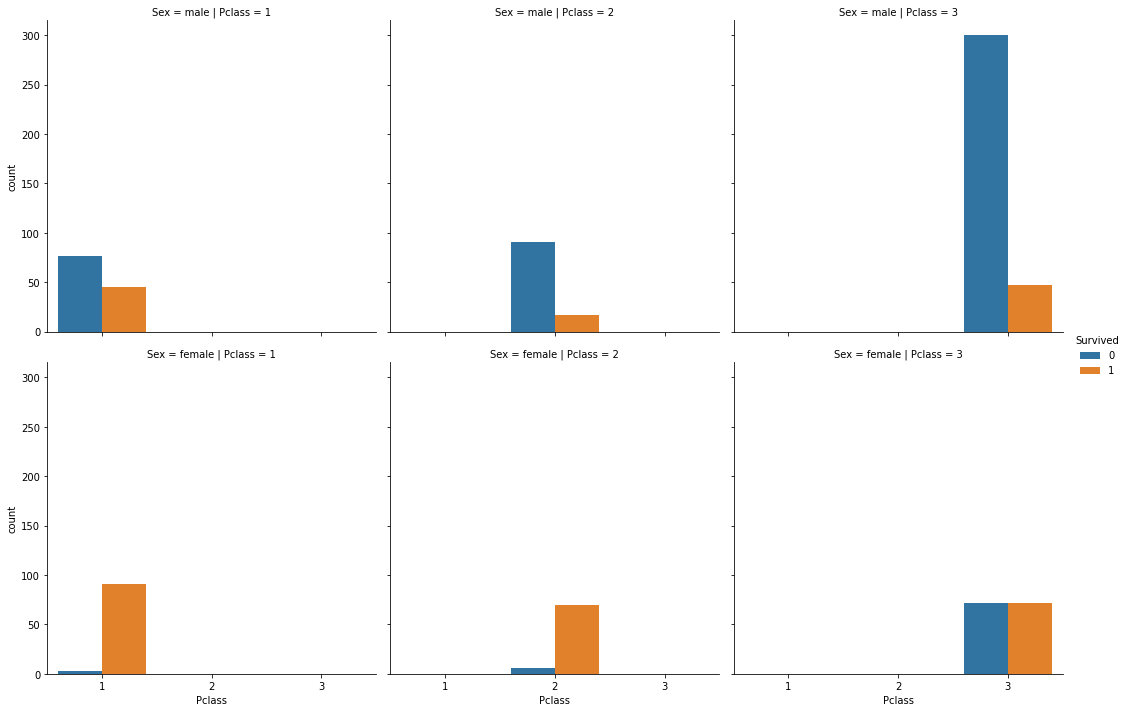

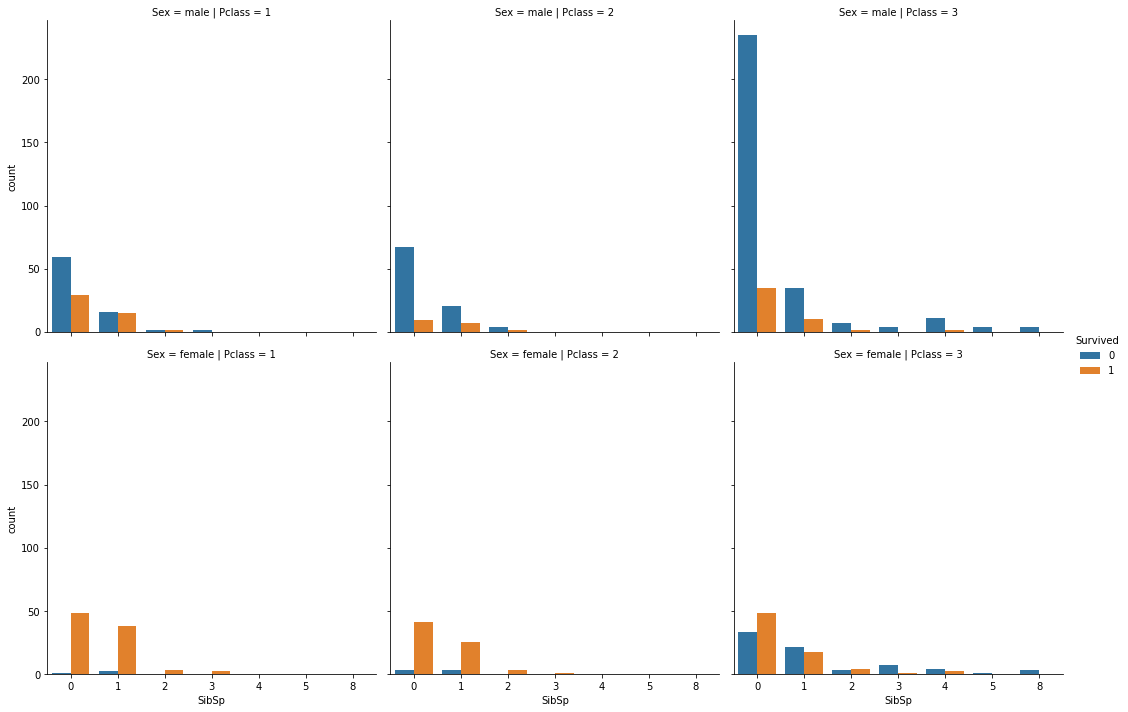

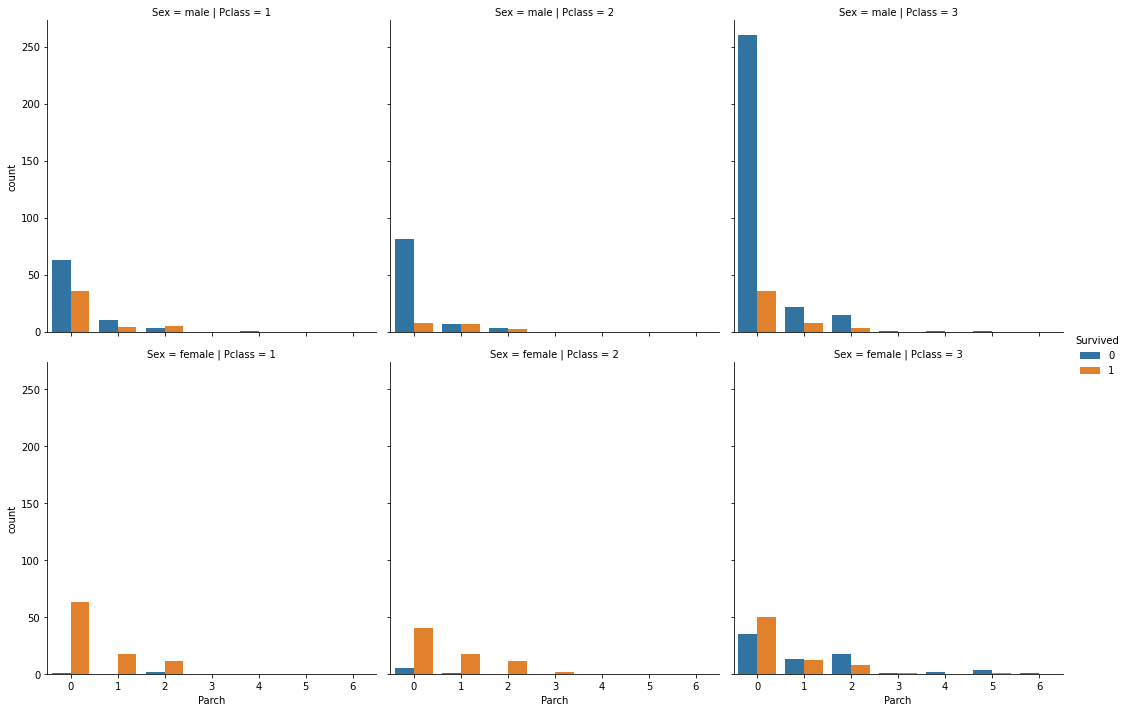

In [8]:
# sns.countplot(x='Sex', hue='Survived', data=df_train)
sns.catplot(x='Sex', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', y='Fare', data=df_train)
pp.show()
sns.catplot(x='Pclass', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='SibSp', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='Parch', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

#sns.histplot(x='Age', hue='Survived', data=df_train, binwidth=5.0)
#sns.displot(x='Age', hue='Survived', col='Survived', data=df_train)
#pp.show()

# Distribution plots

## By age

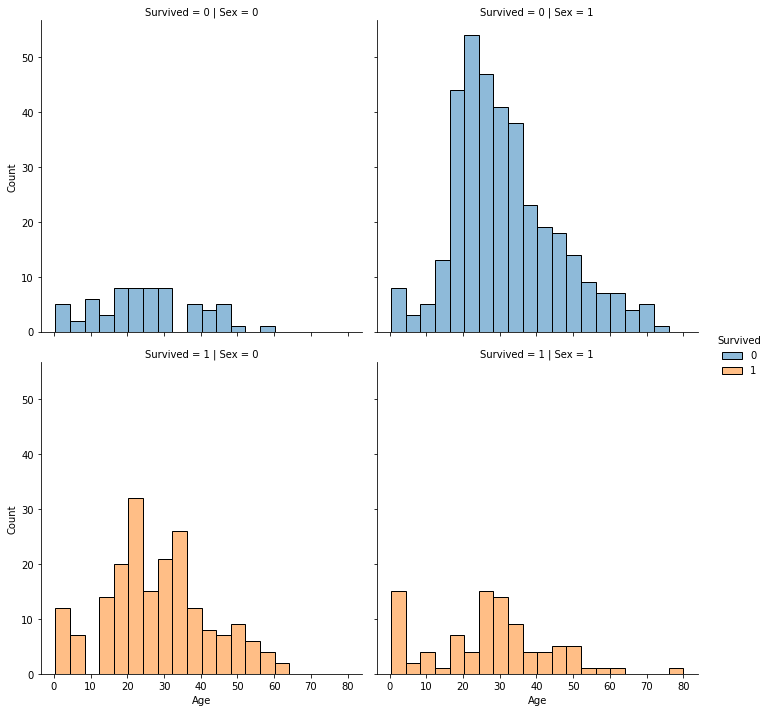

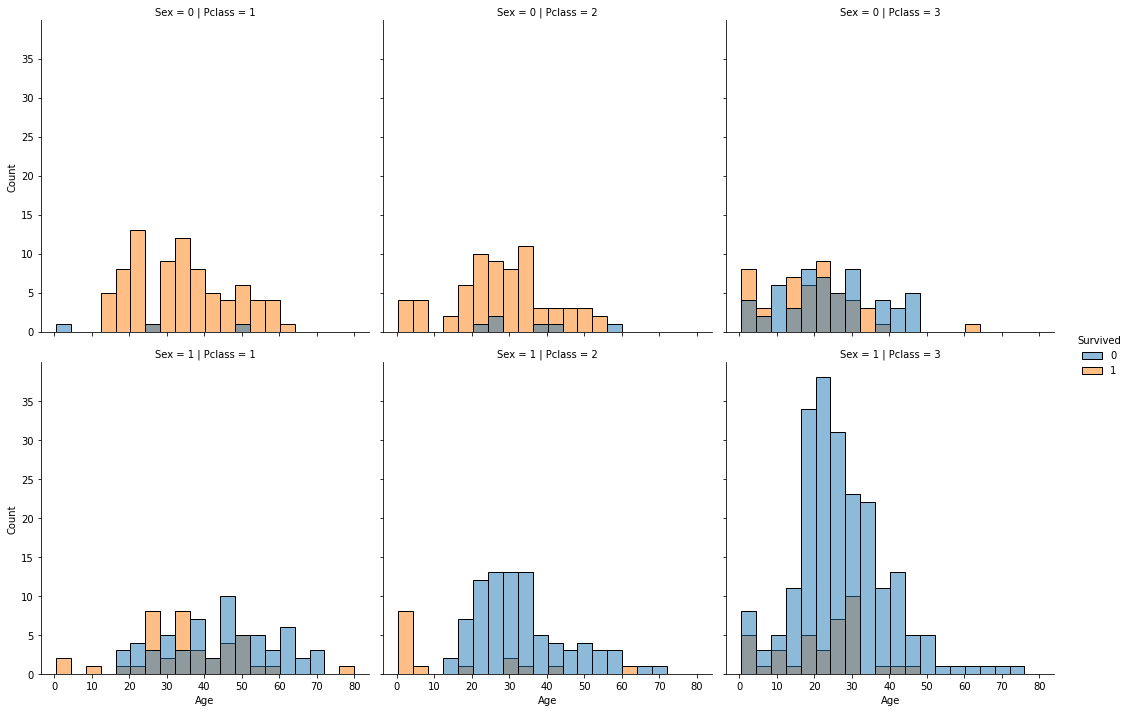

In [9]:
sns.displot(x='Age', hue='Survived', col='Sex', row='Survived', data=X_y)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Sex', data=X_y)
pp.show()

## By fare

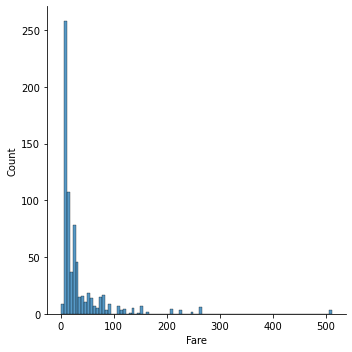

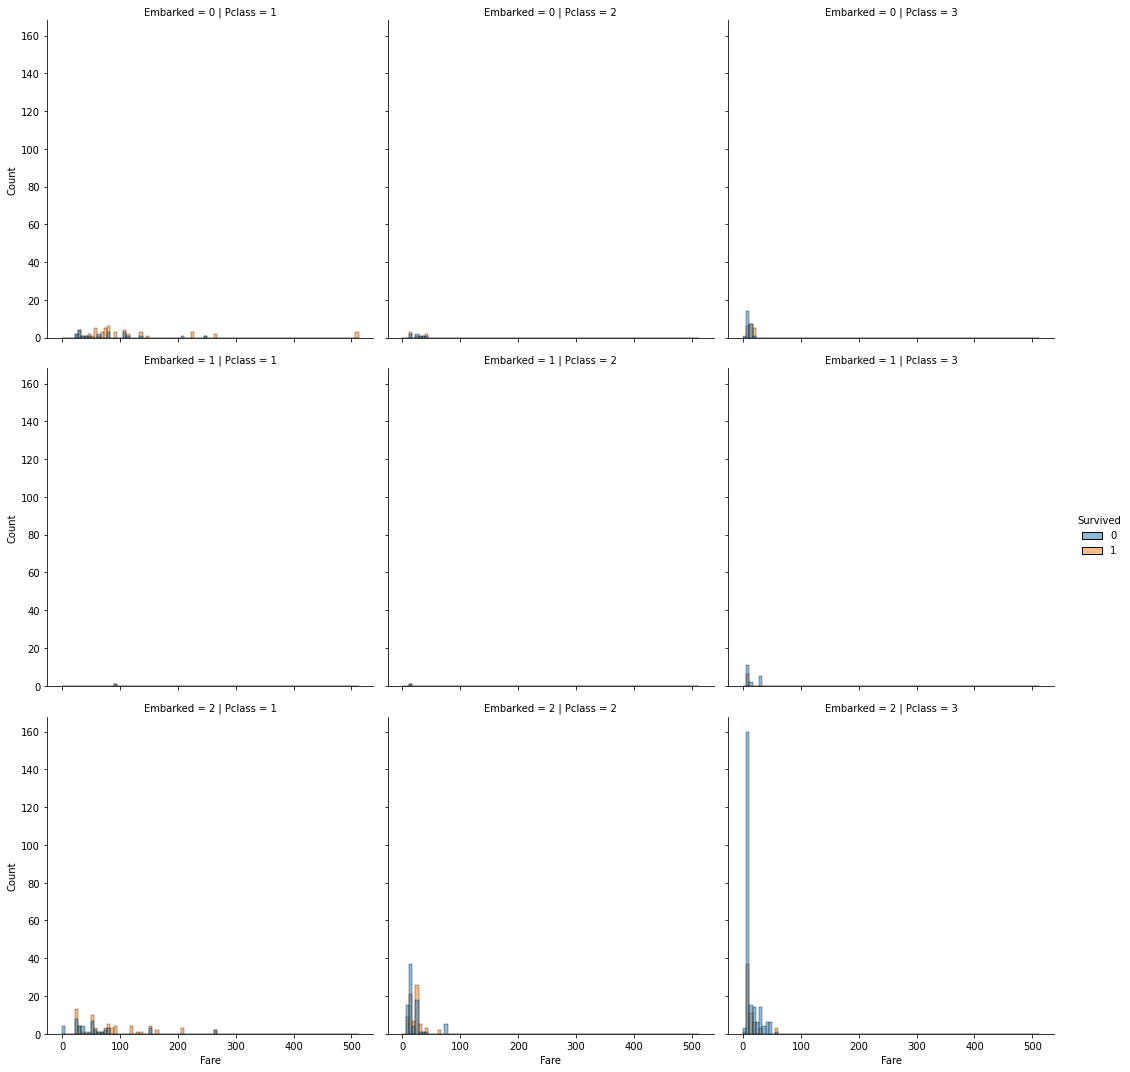

In [10]:
sns.displot(x='Fare', data=X_y)
pp.show()


sns.displot(x='Fare', hue='Survived', col='Pclass', row="Embarked", data=X_y)
pp.show()


In [11]:
# Numeric features: Find pairwise linear dependencies with pair plots in

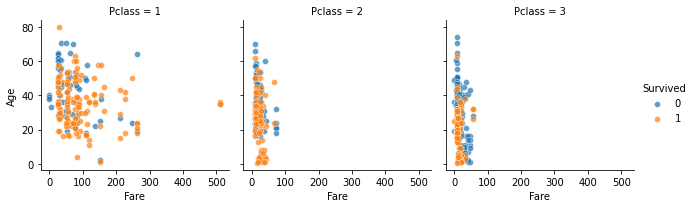

In [12]:
g = sns.FacetGrid(X_y, col="Pclass", hue="Survived")
g.map(sns.scatterplot, "Fare", "Age", alpha=.7)
g.add_legend()


# DecisionTree: Create train and test data from train data set

DecisionTreeClassifier(max_depth=5, random_state=42)

0.769972613458529

0.06537337718656974

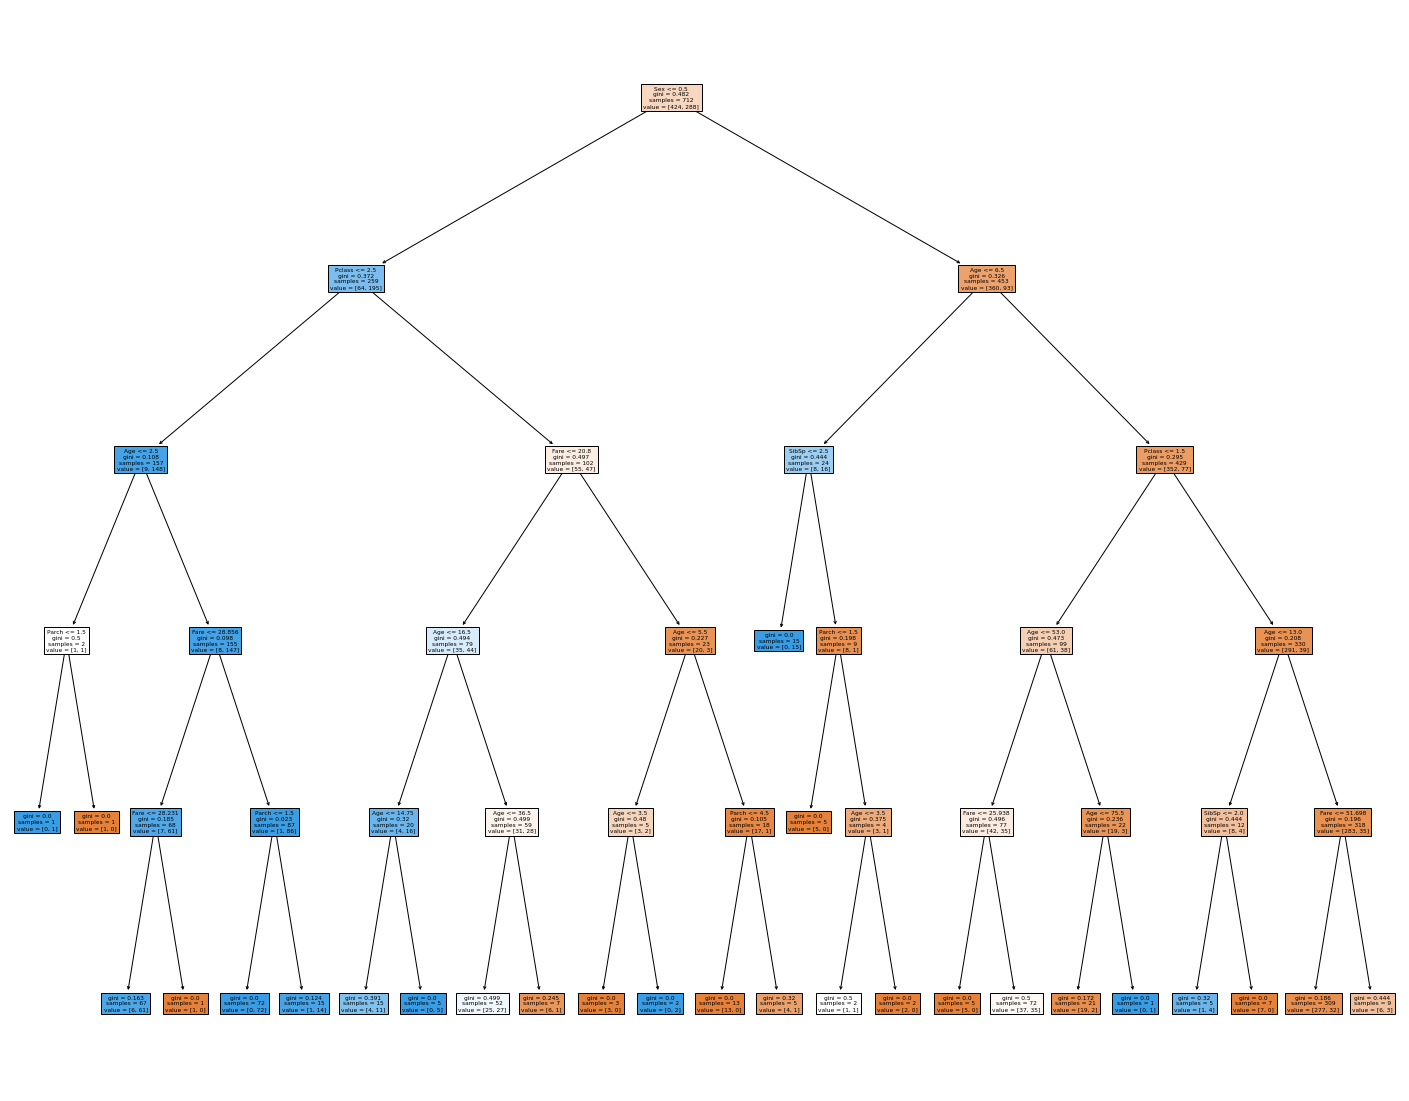

In [14]:
from decision_tree_visu import plot_classifier as plot_clf
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X.to_numpy(), y.to_numpy())
cls.

plot_clf(clf=clf, feature_names=[i for i in X.columns])

scores = cross_val_score(DecisionTreeClassifier(random_state=42), cv=10, X=X.to_numpy(), y=y.to_numpy(), scoring=make_scorer(accuracy_score))
scores.mean()
scores.std()


# RandomForest: Create train and test data from train data set

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


n_max_features = int(np.sqrt(X.columns.size))
classifier = RandomForestClassifier(max_features=n_max_features, random_state=42)
# classifier.fit(X_train, y_train)

scores = cross_val_score(RandomForestClassifier(max_features=n_max_features, random_state=42), cv=10, X=X.to_numpy(), y=y.to_numpy())
scores.mean()
scores.std()